In [8]:
!unzip /content/Slash_DATASET.zip

Archive:  /content/Slash_DATASET.zip
replace Slash_DATASET/Accessories/001_accessories.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Slash_DATASET/Accessories/001_accessories.png  
replace Slash_DATASET/Accessories/002_accessories.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Slash_DATASET/Accessories/002_accessories.png  
replace Slash_DATASET/Accessories/003_accessories.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Slash_DATASET/Accessories/003_accessories.png  
replace Slash_DATASET/Accessories/004_accessories.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Slash_DATASET/Accessories/004_accessories.png  
  inflating: Slash_DATASET/Accessories/005_accessories.png  
  inflating: Slash_DATASET/Accessories/006_accessories.png  
  inflating: Slash_DATASET/Accessories/007_accessories.png  
  inflating: Slash_DATASET/Accessories/008_accessories.png  
  inflating: Slash_DATASET/Accessories/009_accessories.png  
  inflating: Slash_DATASET/Accesso

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D ,BatchNormalization ,InputLayer ,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
CONFIG ={
    'IMAGE_SIZE' : 256,
    'TRAIN_RATIO' : 0.8,
    'BATCH_SIZE' : 32,
    'N_CLASSES' : 8 ,
    'N_EPOCHS' :50 ,
    'DATA_PATH' :'/content/Slash_DATASET/'
}

In [11]:
def list_folders_in_folder(folder_path):
    files = os.listdir(folder_path)
    return files

In [12]:
folder = list_folders_in_folder(CONFIG['DATA_PATH'])
print(folder)

['Artifacts', 'Fashion', 'Stationary', 'Games', 'Nutrition', 'Beauty', 'Accessories', 'Home']


In [13]:
for root, dirs, filenames in os.walk(CONFIG['DATA_PATH']):
    print(root)
    print(dirs)
    print(filenames)

/content/Slash_DATASET/
['Artifacts', 'Fashion', 'Stationary', 'Games', 'Nutrition', 'Beauty', 'Accessories', 'Home']
[]
/content/Slash_DATASET/Artifacts
[]
['036_artifact.png', '031_artifact.png', '024_artifact.png', '023_artifact.png', '034_artifact.png', '014_artifact.png', '025_artifact.png', '027_artifact.png', '040_artifact.png', '030_artifact.png', '016_artifact.png', '005_artifact.png', '020_artifact.png', '011_artifact.png', '022_artifact.png', '038_artifact.png', '032_artifact.png', '006_artifact.png', '008_artifact.png', '018_artifact.png', '001_artifact.png', '007_artifact.png', '021_artifact.png', '017_artifact.png', '002_artifact.png', '009_artifact.png', '037_artifact.png', '003_artifact.png', '035_artifact.png', '028_artifact.png', '033_artifact.png', '012_artifact.png', '004_artifact.png', '013_artifact.png', '026_artifact.png', '010_artifact.png', '029_artifact.png', '039_artifact.png', '019_artifact.png', '015_artifact.png']
/content/Slash_DATASET/Fashion
[]
['074_fa

In [14]:
def list_files_in_folders(folder_path):
    files = []
    labels = []
    for root, dirs, filenames in os.walk(folder_path):
        for filename in filenames:
            labels.append(filename.split('_')[1][:-4])
            files.append(os.path.join(root, filename))
    return files ,labels

In [15]:
files ,labels = list_files_in_folders(CONFIG['DATA_PATH'])
print(files)
print(labels)

['/content/Slash_DATASET/Artifacts/036_artifact.png', '/content/Slash_DATASET/Artifacts/031_artifact.png', '/content/Slash_DATASET/Artifacts/024_artifact.png', '/content/Slash_DATASET/Artifacts/023_artifact.png', '/content/Slash_DATASET/Artifacts/034_artifact.png', '/content/Slash_DATASET/Artifacts/014_artifact.png', '/content/Slash_DATASET/Artifacts/025_artifact.png', '/content/Slash_DATASET/Artifacts/027_artifact.png', '/content/Slash_DATASET/Artifacts/040_artifact.png', '/content/Slash_DATASET/Artifacts/030_artifact.png', '/content/Slash_DATASET/Artifacts/016_artifact.png', '/content/Slash_DATASET/Artifacts/005_artifact.png', '/content/Slash_DATASET/Artifacts/020_artifact.png', '/content/Slash_DATASET/Artifacts/011_artifact.png', '/content/Slash_DATASET/Artifacts/022_artifact.png', '/content/Slash_DATASET/Artifacts/038_artifact.png', '/content/Slash_DATASET/Artifacts/032_artifact.png', '/content/Slash_DATASET/Artifacts/006_artifact.png', '/content/Slash_DATASET/Artifacts/008_artifac

In [16]:
len(files)

302

In [17]:
df = pd.DataFrame({'path': files, 'category': labels})

In [18]:
df.to_excel('slash.xlsx', index=False)

In [19]:
df.head()

,path,category
0,/content/Slash_DATASET/Artifacts/036_artifact.png,artifact
1,/content/Slash_DATASET/Artifacts/031_artifact.png,artifact
2,/content/Slash_DATASET/Artifacts/024_artifact.png,artifact
3,/content/Slash_DATASET/Artifacts/023_artifact.png,artifact
4,/content/Slash_DATASET/Artifacts/034_artifact.png,artifact


In [20]:
import pandas as pd
for index, row in df.iterrows():
    print(row['path'])
    break

/content/Slash_DATASET/Artifacts/036_artifact.png


In [21]:
def read_image(df):
    images = []
    labels = []
    for index, row in df.iterrows():
       image = cv2.imread(row['path'])
       image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       images.append(image)
       labels.append(row['category'])
    return images , labels

In [22]:
images , labels = read_image(df)

In [23]:
random_numbers = [random.randint(0, 221) for _ in range(16)]

In [24]:
random_numbers

[155, 49, 18, 176, 68, 144, 115, 203, 140, 176, 24, 152, 139, 117, 136, 20]

In [25]:
def resize_normalize_batch(images, labels):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, (CONFIG['IMAGE_SIZE'], CONFIG['IMAGE_SIZE']))
        resized_image = resized_image / 255.
        resized_images.append(resized_image)
    return np.array(resized_images), labels

In [26]:
images , labels = resize_normalize_batch(images , labels)

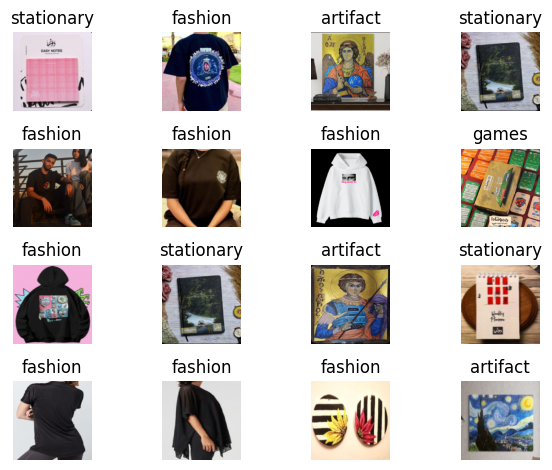

In [27]:
fig, axes = plt.subplots(4, 4)
axes = axes.flatten()

for i, ax in enumerate(axes):
    rand = random_numbers[i]
    if rand < len(images):
        ax.imshow(images[rand])
        ax.set_title(labels[rand])
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [28]:
images[5].shape

(256, 256, 3)

In [29]:
label_to_index = {label: i for i, label in enumerate(set(labels))}

In [30]:
label_to_index

{'artifact': 0,
 'beauty': 1,
 'home': 2,
 'fashion': 3,
 'stationary': 4,
 'accessories': 5,
 'games': 6,
 'nutrition': 7}

In [31]:
labels = [label_to_index[label] for label in labels]

In [32]:
labels = tf.convert_to_tensor(labels)

In [33]:
images = tf.convert_to_tensor(images)

In [34]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))

In [35]:
shuffle_buffer_size = len(images)
dataset = dataset.shuffle(shuffle_buffer_size)

In [36]:
train_size = int(len(images) * CONFIG['TRAIN_RATIO'])

In [37]:
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

In [38]:
train_dataset = train_dataset.batch(CONFIG['BATCH_SIZE'])
test_dataset = test_dataset.batch(CONFIG['BATCH_SIZE'])

In [39]:
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [52]:
model = Sequential([
    InputLayer(input_shape =(CONFIG['IMAGE_SIZE'] ,CONFIG['IMAGE_SIZE'],3)),
    Conv2D(filters = 6 ,kernel_size= 6 ,padding ='valid' , activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2) , strides=2),


     Conv2D(filters = 16 ,kernel_size= 3 ,padding ='valid' , activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2) , strides=2),

    Flatten(),
    Dense(64 , activation = 'relu'),
    BatchNormalization(),

    Dense(16 , activation = 'relu'),
    BatchNormalization(),

    Dense(CONFIG['N_CLASSES'], activation='softmax')

])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 251, 251, 6)       654       
                                                                 
 batch_normalization_4 (Bat  (None, 251, 251, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 125, 125, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 123, 123, 16)      880       
                                                                 
 batch_normalization_5 (Bat  (None, 123, 123, 16)      64        
 chNormalization)                                                
                                                      

In [54]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' ,  metrics=['accuracy'])

In [55]:
history = model.fit(train_dataset, validation_data=test_dataset , epochs=CONFIG['N_EPOCHS'])

Epoch 1/50
8/8 [==============================] - 4s 97ms/step - loss: 2.2737 - accuracy: 0.2199 - val_loss: 2.3672 - val_accuracy: 0.2951
Epoch 2/50
8/8 [==============================] - 1s 67ms/step - loss: 1.6698 - accuracy: 0.4315 - val_loss: 1.8330 - val_accuracy: 0.4098
Epoch 3/50
8/8 [==============================] - 0s 58ms/step - loss: 1.5379 - accuracy: 0.4689 - val_loss: 1.7835 - val_accuracy: 0.3443
Epoch 4/50
8/8 [==============================] - 0s 56ms/step - loss: 1.3056 - accuracy: 0.6224 - val_loss: 1.7412 - val_accuracy: 0.3770
Epoch 5/50
8/8 [==============================] - 0s 55ms/step - loss: 1.1257 - accuracy: 0.7012 - val_loss: 1.7059 - val_accuracy: 0.5410
Epoch 6/50
8/8 [==============================] - 0s 57ms/step - loss: 0.9562 - accuracy: 0.7842 - val_loss: 1.8160 - val_accuracy: 0.4918
Epoch 7/50
8/8 [==============================] - 1s 69ms/step - loss: 0.8038 - accuracy: 0.8506 - val_loss: 1.6507 - val_accuracy: 0.5246
Epoch 8/50
8/8 [===========

In [56]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

2/2 [==============================] - 0s 30ms/step - loss: 0.1467 - accuracy: 1.0000
Test Accuracy: 1.0
Test Loss: 0.14666786789894104


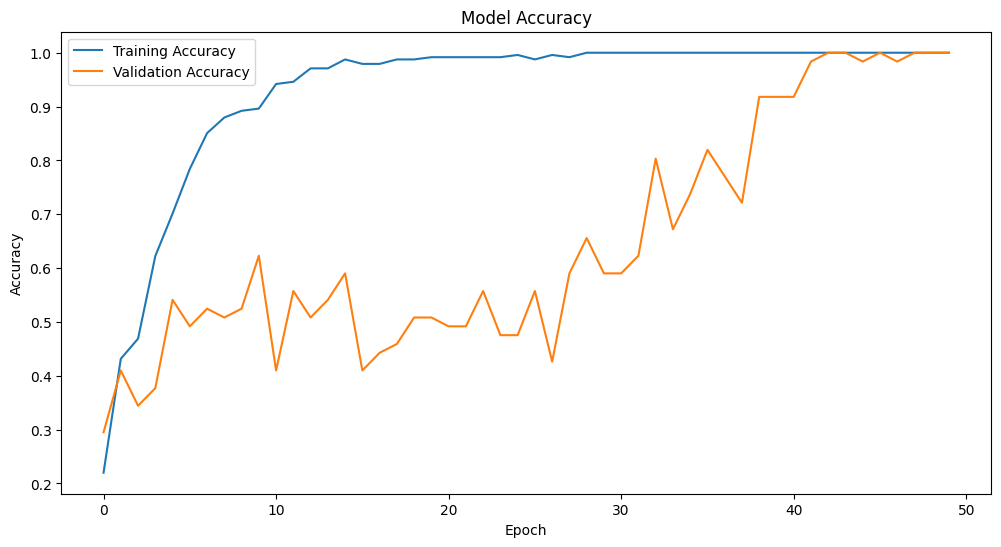

In [58]:
plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


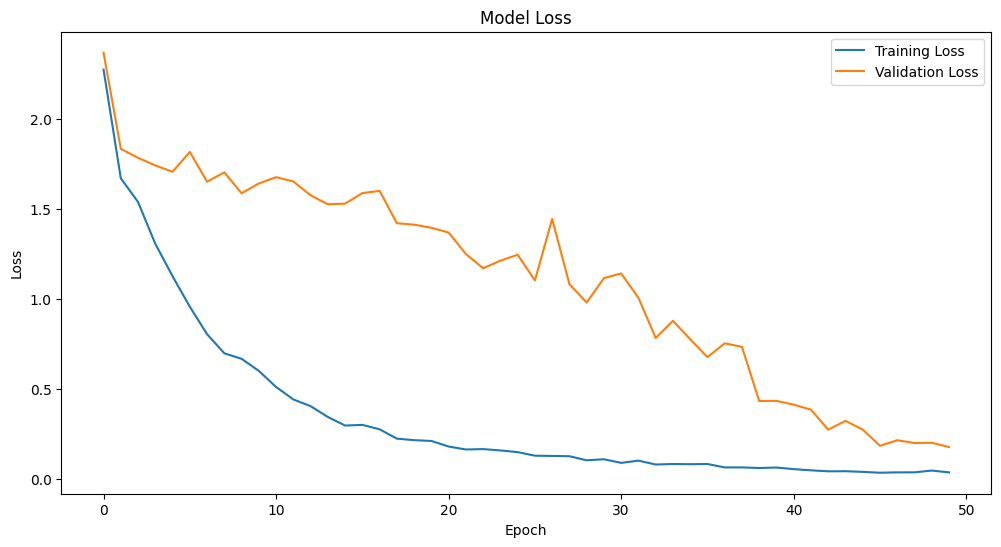

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [60]:
def get_class_name(index):
    return list(label_to_index.keys())[index]

1/1 [==============================] - 0s 163ms/step


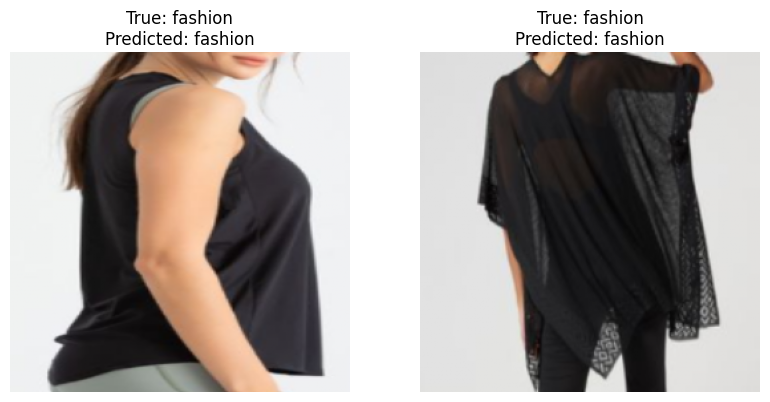

In [61]:
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  ax.imshow(image[0])
  plt.title(f"True: {get_class_name(label.numpy()[0])}\nPredicted: {get_class_name(np.argmax(model.predict(image), axis=1)[0])}")
  plt.axis('off')

1/1 [==============================] - 0s 59ms/step


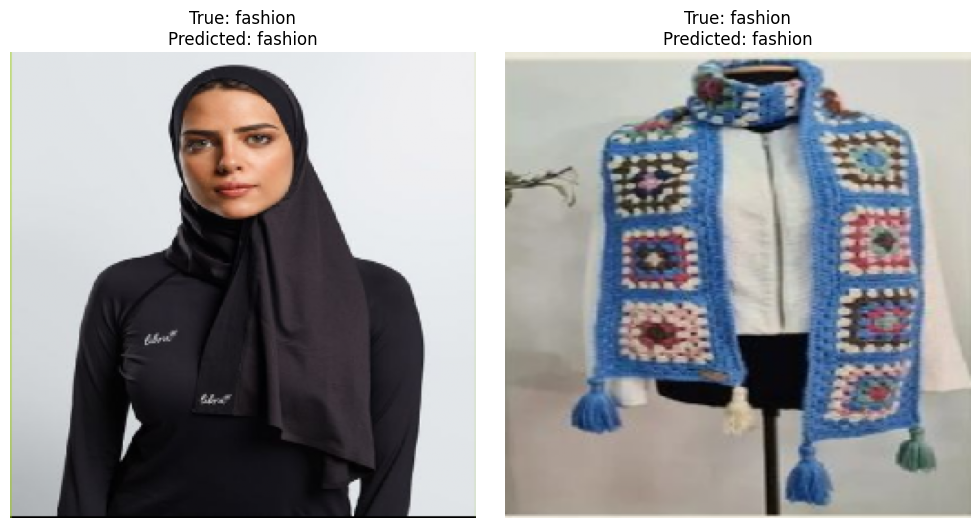

In [62]:
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(test_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(image[0].numpy())
    ax.set_title(f"True: {get_class_name(label.numpy()[0])}\nPredicted: {get_class_name(np.argmax(model.predict(image), axis=1)[0])}")
    ax.axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 58ms/step


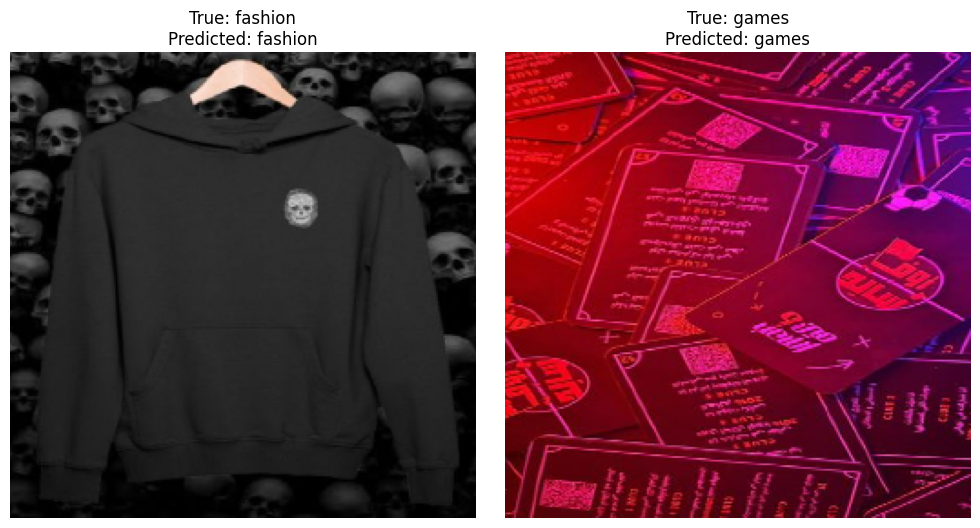

In [63]:
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(test_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(image[0].numpy())
    ax.set_title(f"True: {get_class_name(label.numpy()[0])}\nPredicted: {get_class_name(np.argmax(model.predict(image), axis=1)[0])}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [65]:
test_image = cv2.imread('/content/photo_6023573895157759907_y.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(test_image, (CONFIG['IMAGE_SIZE'], CONFIG['IMAGE_SIZE']))
resized_image = resized_image / 255.

In [66]:
def resize_image(image, target_shape=(256, 256)):
    return tf.image.resize(image, target_shape)

In [67]:
resized_image.shape

(256, 256, 3)

1/1 [==============================] - 0s 242ms/step


(-0.5, 255.5, 255.5, -0.5)

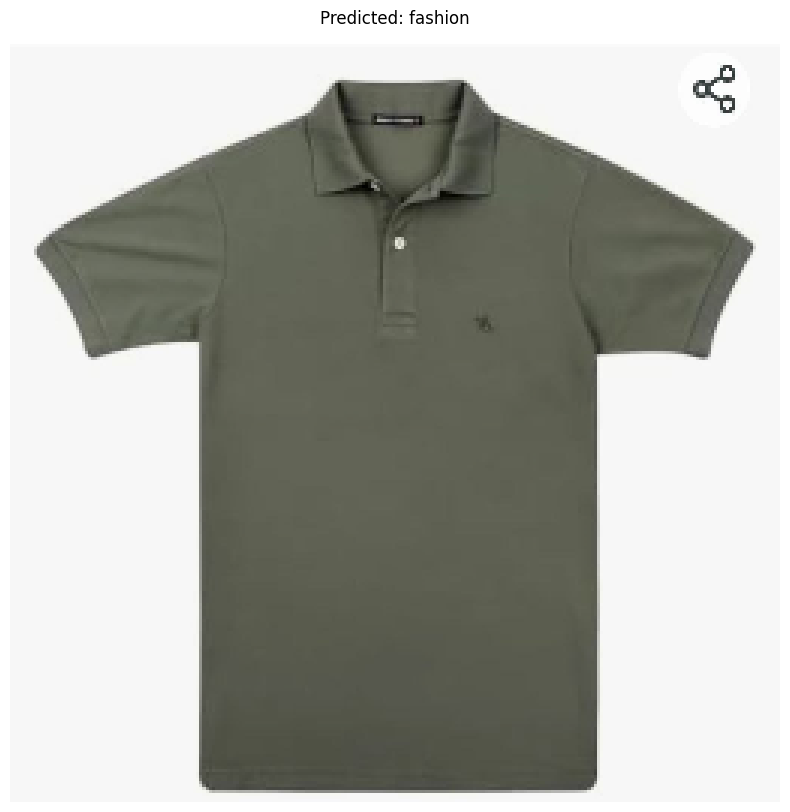

In [68]:
plt.figure(figsize=(10, 10))
plt.imshow(resized_image)
resized_image = resize_image(resized_image)
image = np.expand_dims(resized_image, axis=0)
plt.title(f"Predicted: {get_class_name(np.argmax(model.predict(image), axis=1)[0])}")
plt.axis('off')

In [69]:
model.save('/content/drive/MyDrive/slash')

In [71]:
true_labels = []
predicted_labels = []
im = []
for images, labels in test_dataset:
    for image, label in zip(images, labels):
        true_labels.append(label.numpy())
        im.append(image.numpy())
        plt.show()
        predicted_label = np.argmax(model.predict(np.expand_dims(image, axis=0)), axis=1)[0]
        predicted_labels.append(predicted_label)



1/1 [==============================] - 0s 29ms/step


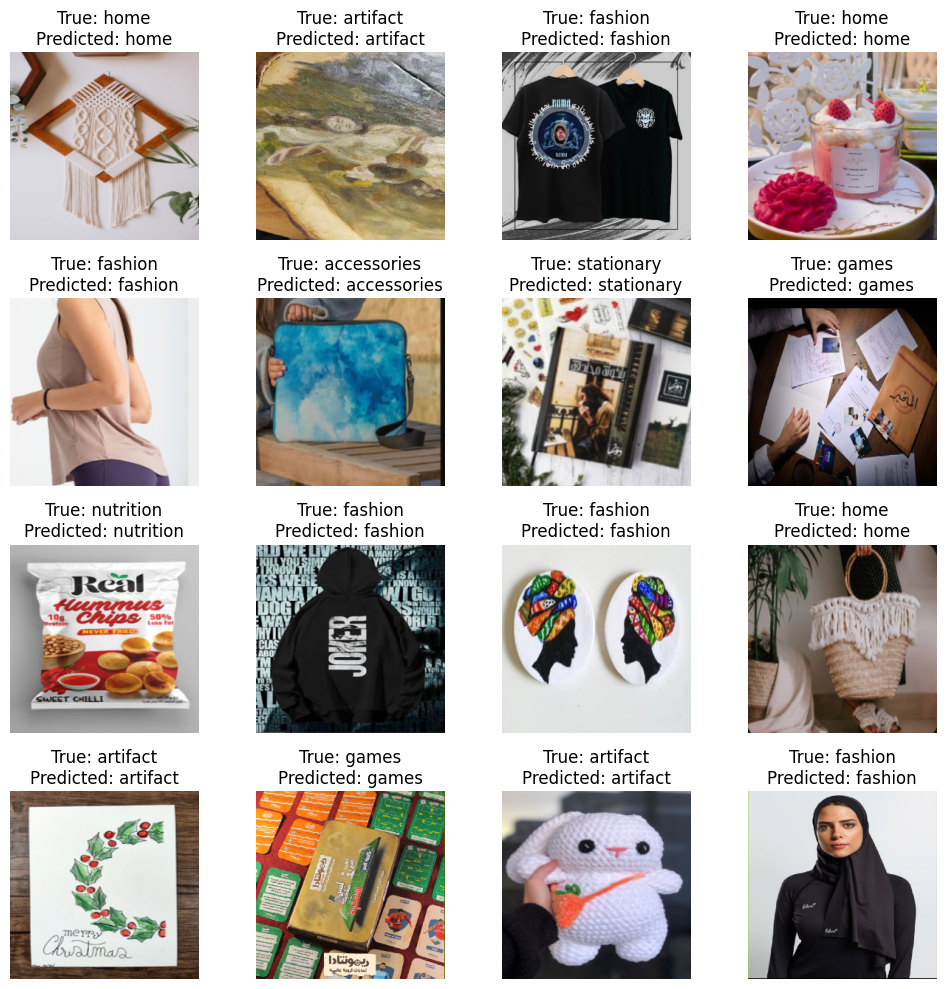

In [72]:
plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ax.imshow(im[i])
    ax.set_title(f"True: {get_class_name(true_labels[i])}\nPredicted: {get_class_name(predicted_labels[i])}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [73]:
cm = confusion_matrix(true_labels, predicted_labels)

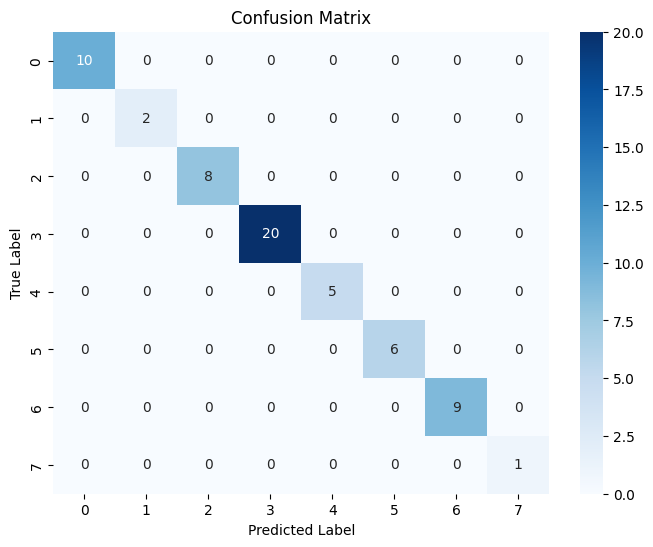

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()